In [1]:
import pandas as pd
import numpy as np
train_df=pd.read_csv('train_ctrUa4K.csv')

In [2]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [5]:
train_df=train_df.drop(columns='Loan_ID')

In [6]:
train_df['Credit_History'].unique()

array([ 1.,  0., nan])

In [7]:
type(train_df['Loan_Amount_Term'].unique())

numpy.ndarray

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
null_cols=train_df.isna().any()
null_cols

Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [10]:
train_df.fillna(train_df[['Credit_History','Loan_Amount_Term']].mode().iloc[0], inplace=True)


In [11]:

train_df['Credit_History']=train_df['Credit_History'].astype('str')


train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].astype('str')

In [12]:
train_df['Credit_History'].unique()

array(['1.0', '0.0'], dtype=object)

In [13]:
cat_col=train_df.select_dtypes(include=['object'])
cat_col.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
cont_col=train_df.select_dtypes(include=['int64','float64'])
cont_col.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')

In [15]:
train_df[cont_col.columns].isna().any()

ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
dtype: bool

In [16]:
cols=train_df[cat_col.columns].loc[:,train_df[cat_col.columns].isna().any()]
cols.columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed'], dtype='object')

In [17]:
cat_col.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
train_df.fillna(train_df[cat_col.columns].mode().iloc[0], inplace=True)


In [19]:
train_df[cat_col.columns].isna().any()

Gender              False
Married             False
Dependents          False
Education           False
Self_Employed       False
Loan_Amount_Term    False
Credit_History      False
Property_Area       False
Loan_Status         False
dtype: bool

In [20]:
dummy_df=pd.get_dummies(train_df[cat_col.columns],drop_first=True)

In [21]:
dummy_df

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1
3,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
610,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
611,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1
612,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1


In [22]:
train_df=pd.concat([train_df,dummy_df],axis=1)

In [44]:
train_df=train_df.drop(columns=cat_col.columns)

In [23]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,...,0,0,1,0,0,0,1,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,...,0,0,1,0,0,0,1,0,0,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,...,0,0,0,0,0,0,1,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1


In [24]:
train_df[cat_col.columns].isna().any()

Gender              False
Married             False
Dependents          False
Education           False
Self_Employed       False
Loan_Amount_Term    False
Credit_History      False
Property_Area       False
Loan_Status         False
dtype: bool

In [25]:
train_df.loc[train_df['LoanAmount'].isna()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,...,0,0,1,0,0,0,0,0,0,0
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,1,0,1
95,Male,No,0,Graduate,No,6782,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,1,0
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,1,0,1
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,1,0,1
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,...,0,0,1,0,0,0,1,0,0,1
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,...,0,0,0,0,0,0,1,0,1,0


In [26]:
corr=train_df.corr().abs()

In [27]:
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,...,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
ApplicantIncome,1.000000,0.116605,0.570909,0.058809,0.051708,0.040861,0.034650,0.156687,0.140760,0.127180,...,0.067018,0.018580,0.054644,0.026042,0.003474,0.016914,0.018615,0.014246,0.000598,0.004710
CoapplicantIncome,0.116605,1.000000,0.188619,0.082912,0.075948,0.029769,0.010016,0.041491,0.062290,0.016100,...,0.033155,0.031698,0.045559,0.032920,0.024034,0.014616,0.011134,0.027044,0.022776,0.059187
LoanAmount,0.570909,0.188619,1.000000,0.109520,0.149743,0.063596,0.019856,0.156271,0.171133,0.117421,...,0.067884,0.019685,0.000674,0.010159,0.004366,0.013659,0.001463,0.008401,0.034003,0.037318
Gender_Male,0.058809,0.082912,0.109520,1.000000,0.364569,0.004466,0.129953,0.096319,0.045364,0.000525,...,0.040174,0.047012,0.060806,0.034526,0.027002,0.014173,0.009170,0.108623,0.034530,0.017987
Married_Yes,0.051708,0.075948,0.149743,0.364569,1.000000,0.113853,0.249547,0.132566,0.012304,0.004489,...,0.035885,0.078437,0.053978,0.084144,0.018387,0.059018,0.010938,0.005845,0.000546,0.091478
Dependents_1,0.040861,0.029769,0.063596,0.004466,0.113853,1.000000,0.198046,0.134337,0.013355,0.082044,...,0.004852,0.051281,0.054712,0.042286,0.025516,0.072641,0.009757,0.011661,0.069320,0.038740
Dependents_2,0.034650,0.010016,0.019856,0.129953,0.249547,0.198046,1.000000,0.133547,0.020822,0.032434,...,0.026292,0.025365,0.006575,0.013302,0.025365,0.073285,0.007987,0.012017,0.016569,0.062384
Dependents_3+,0.156687,0.041491,0.156271,0.096319,0.132566,0.134337,0.133547,1.000000,0.055288,0.003278,...,0.037722,0.017206,0.078999,0.009401,0.086365,0.024372,0.060473,0.007863,0.047460,0.026123
Education_Not Graduate,0.140760,0.062290,0.171133,0.045364,0.012304,0.013355,0.020822,0.055288,1.000000,0.010383,...,0.004461,0.038995,0.087713,0.018553,0.038995,0.042786,0.073658,0.039410,0.034279,0.085884
Self_Employed_Yes,0.127180,0.016100,0.117421,0.000525,0.004489,0.082044,0.032434,0.003278,0.010383,1.000000,...,0.042033,0.022443,0.017046,0.031114,0.061583,0.027721,0.001550,0.008710,0.030338,0.003700


In [28]:
feature=corr['ApplicantIncome'].sort_values(axis=0,ascending=False).index[1]

In [29]:
feature

'LoanAmount'

In [30]:
train_df['Loan_Amount_Term'].unique()

array(['360.0', '120.0', '240.0', '180.0', '60.0', '300.0', '480.0',
       '36.0', '84.0', '12.0'], dtype=object)

In [31]:
df_loan_amt=train_df.dropna(axis=0,subset=['LoanAmount','ApplicantIncome'])
df_loan_amt=df_loan_amt.loc[:,['LoanAmount','ApplicantIncome']]

In [32]:
df_loan_amt.isna().any()

LoanAmount         False
ApplicantIncome    False
dtype: bool

In [33]:
loan_amt_null_df=train_df['LoanAmount'].isna()

In [34]:
loan_amt_null_df

0       True
1      False
2      False
3      False
4      False
       ...  
609    False
610    False
611    False
612    False
613    False
Name: LoanAmount, Length: 614, dtype: bool

In [35]:
X=df_loan_amt[['ApplicantIncome']]
Y=df_loan_amt['LoanAmount']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=100)
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,Y_train)
y_pred=lm.predict(X_test)

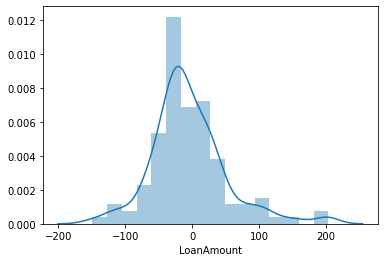

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
res=Y_test-y_pred
sns.distplot(res)

In [38]:
train_df.loc[train_df['LoanAmount'].isna(),'LoanAmount']=lm.predict(train_df[['ApplicantIncome']])[train_df['LoanAmount'].isna()]

In [39]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,Male,No,0,Graduate,No,5849,0.0,150.840146,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,0,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,...,0,0,0,0,0,0,1,0,0,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1


In [40]:
train_df[cat_col.columns].isna().any()

Gender              False
Married             False
Dependents          False
Education           False
Self_Employed       False
Loan_Amount_Term    False
Credit_History      False
Property_Area       False
Loan_Status         False
dtype: bool

In [41]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,...,Loan_Amount_Term_300.0,Loan_Amount_Term_36.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,Male,No,0,Graduate,No,5849,0.0,150.840146,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,0,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,...,0,0,1,0,0,0,1,0,1,1


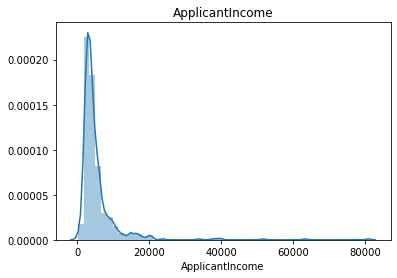

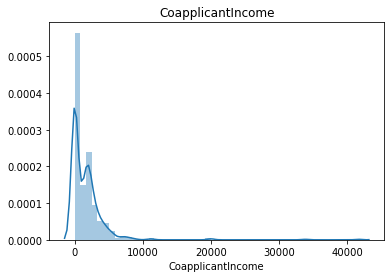

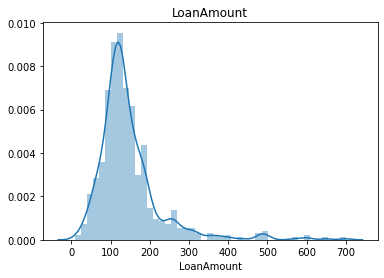

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in cont_col.columns:
    sns.distplot(train_df[i])
    plt.title(i)
    plt.show()

In [43]:
train_df[cont_col.columns].describe(percentiles=[0.5,0.75,0.9,0.95,0.99])

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.439994
std,6109.041673,2926.248369,84.286164
min,150.000000,0.000000,9.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,165.750000
90%,9459.900000,3782.200000,232.800000
95%,14583.000000,4997.400000,293.400000
99%,32540.410000,8895.890000,495.870000
max,81000.000000,41667.000000,700.000000
